In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exponential regression

### Prediction

$$
\begin{align*}
y &= A \exp{(\mathbf{w^\intercal x})} \\
\end{align*}
$$

### Derivation using the linear model

$$
\begin{align*}
y &= A \exp{(\mathbf{w^\intercal x})} \\
\log{y} &= \log{A} + \mathbf{w^\intercal x}
\end{align*}
$$

In [2]:
class ExponentialRegression:

    def __init__(self) -> None:
        """
        Exponential Regression implemented using the Moore-Penrose pseudo-inverse of a matrix.

        Attributes
        ----------
        bias : numpy.float64
            Coefficient obtained by fitting the model.
        
        weights : numpy.ndarray
            Vector of coefficients obtained by fitting the model.
        """

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the exponential model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """
        # Expand the input variables with bias terms
        X = np.hstack((np.ones((len(X), 1)), X))

        # Calculate weights using the pseudo-inverse
        self.weights = np.dot(np.linalg.pinv(X), np.log(y))

        # Bias is the first coeffiecient in the weights vector
        self.bias = np.exp(self.weights[0])

        # All other coefficients are weights
        self.weights = self.weights[1:]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the exponential model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        return self.bias * np.exp(np.dot(X, self.weights))

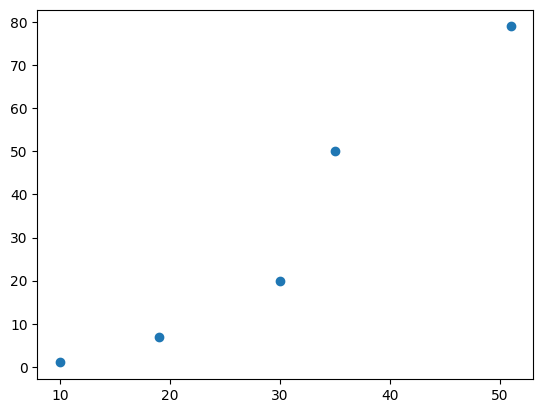

In [3]:
X = np.array([10, 19, 30, 35, 51])
y = np.array([1, 7, 20, 50, 79])

plt.scatter(X, y)
plt.show()

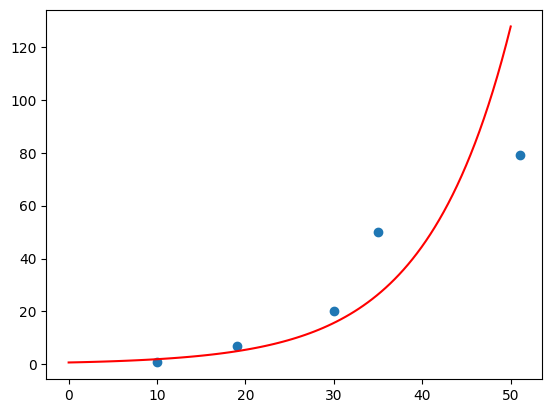

In [4]:
model = ExponentialRegression()
X = X.reshape(-1, 1)
model.fit(X, y)

x = np.linspace(0, 50, 100)

plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()

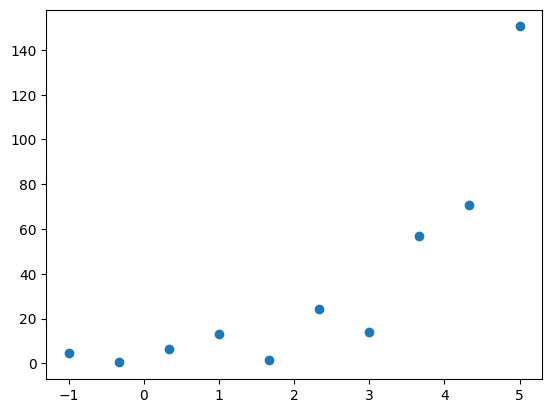

In [5]:
def make_exponential_regression(n_samples: int, noise: float) -> tuple[np.ndarray, np.ndarray]:
    """
    Function for generating 2D exponential regression data.

    Parameters
    ----------
    n_samples : int
        Number of samples to be generated.

    noise : float
        Noise applied to the data. Used as standard deviation parameter when sampling from normal distribution.

    Returns
    -------
    data : tuple[numpy.ndarray, numpy.ndarray]
    """
    X = np.linspace(-1, 5, n_samples)
    y = np.exp(X) + np.random.normal(0, noise, n_samples)
    y = np.where(y < 0.1, np.abs(y), y)
    return X, y

X, y = make_exponential_regression(10, noise=10)

plt.scatter(X, y)
plt.show()

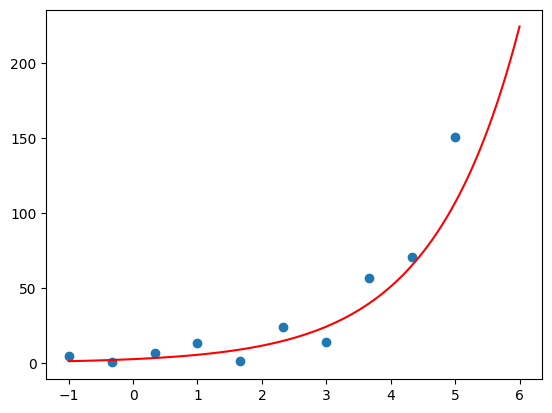

In [6]:
model = ExponentialRegression()
model.fit(X.reshape(-1, 1), y)

x = np.linspace(-1, 6, 100)

plt.scatter(X, y)
plt.plot(x, model.predict(x.reshape(-1, 1)), color='red')
plt.show()